In [1]:
import os
import sys
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import SimpleITK as sitk
import skimage
from os.path import expanduser
import glob
from matplotlib.ticker import MaxNLocator
from scipy.stats import spearmanr
import seg_metrics.seg_metrics as sg
import pickle
import matplotlib.patches as mpatches

In [2]:
print("Python version:", sys.version)
print("Numpy version:", np.__version__)
print("Matplotlib version:", matplotlib.__version__)
print("SITK version:", sitk.__version__)
print("Scikit-image version:", skimage.__version__)

Python version: 3.10.13 (main, Sep 11 2023, 13:44:35) [GCC 11.2.0]
Numpy version: 1.26.2
Matplotlib version: 3.8.2
SITK version: 2.3.1
Scikit-image version: 0.22.0


In [3]:
BASE_DIR = '/home/daryl'

### load the MHA

In [26]:
image_01 = sitk.GetArrayFromImage(sitk.ReadImage('{}/water_tank.mha'.format(BASE_DIR)))
image_02 = sitk.GetArrayFromImage(sitk.ReadImage('{}/donut-02.mha'.format(BASE_DIR)))

In [27]:
image_01.shape

(300, 500, 500)

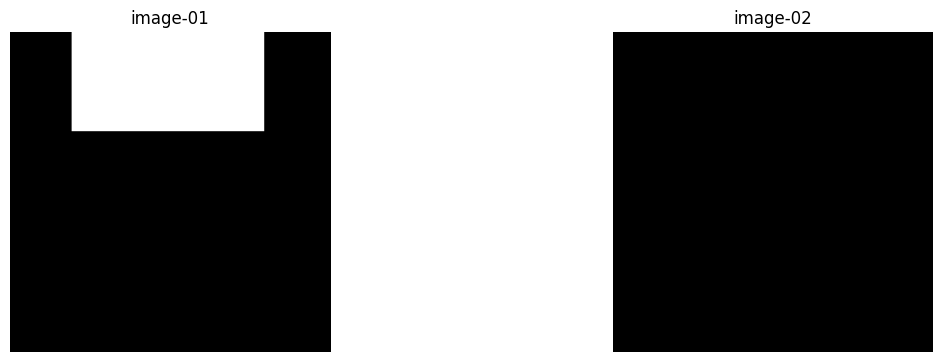

In [28]:
DISPLAY_IDX = 100

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,4))
ax1.imshow(image_01[DISPLAY_IDX], cmap="gray")
ax1.set_title('image-01')
ax1.set_axis_off()

ax2.imshow(image_02[DISPLAY_IDX], cmap="gray")
ax2.set_title('image-02')
ax2.set_axis_off()

# fig.suptitle('Patient ID {}'.format(patient_id), x=0.1, y=1.0, fontsize=12, ha='left')

fig.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.01, 
                    hspace=0.1)

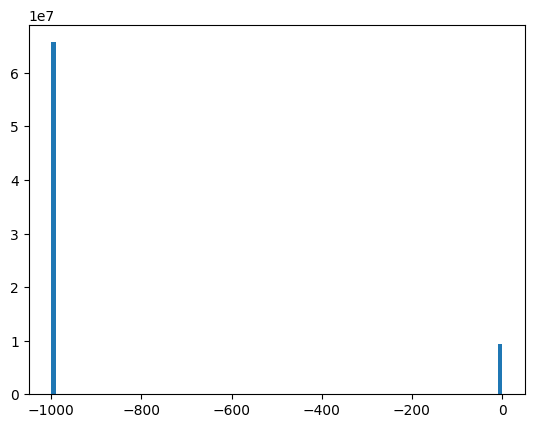

In [29]:
arr = image_01.ravel()
_ = plt.hist(arr, bins=100)